In [89]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Part 1 

In [3]:
# Ans 1 : Its main objective is to prevent layer activation outputs from exploding or vanishing gradients during the forward propagation. If either of the problems occurs, loss gradients will either be too large or too small, and the network will take more time to converge if it is even able to do so at all.
# it is necessary to initialize the weights carefully as so that it should lie in the centre of sigmoid and tanh activation functions and doesnot get at very extreme ends 
# and ends up vanishing the gradient zone 

In [ ]:
# Ans 2: If all the weights are initialized with 0, the derivative with respect to loss function is the same for every w in W[l], thus all weights have the same value in subsequent iterations. This makes hidden units symmetric and continues for all the n iterations i.e. setting weights to 0 does not make it better than a linear model. An important thing to keep in mind is that biases have no effect what so ever when initialized with 0

In [ ]:
# Ans 3: Our initial weights and biases will be picked randomly from the interval [-0.1, 0.1] in a random normal manner, where the mean is 0 and the standard deviation is 0.1 (variance 0.01)
# Weight initialization is used to define the initial values for the parameters in neural network models prior to training the models on a dataset

### Part 2

In [ ]:
# Ans 4: If all the weights are initialized with 0, the derivative with respect to loss function is the same for every w in W[l], thus all weights have the same value in subsequent iterations. This makes hidden units symmetric and continues for all the n iterations i.e. setting weights to 0 does not make it better than a linear model. An important thing to keep in mind is that biases have no effect what so ever when initialized with 0.
# it can be used for cases like linear and logistic regression where answers can be a direct outcome and no weight initialization is necessary

In [ ]:
# Ans 5: Assigning random values to weights is better than just 0 assignment. But there is one thing to keep in my mind is that what happens if weights are initialized high values or very low values and what is a reasonable initialization of weight values
# Xavier initialization,He initialization These methods serve as good starting points for initialization and mitigate the chances of exploding or vanishing gradients. They set the weights neither too much bigger than 1, nor too much less than 1. So, the gradients do not vanish or explode too quickly. They help avoid slow convergence, also ensuring that we do not keep oscillating off the minima

In [4]:
# Ans 6: Xavier Glorot's initialization is one of the most widely used methods for initializing weight matrices in neural networks. While in practice, it is straightforward to utilize in your deep learning setup, reflecting upon the mathematical reasoning behind this standard initialization technique can prove most beneficial.
# The goal of Xavier Initialization is to initialize the weights such that the variance of the activations are the same across every layer. This constant variance helps prevent the gradient from exploding or vanishing

In [ ]:
# Ans 7 : Kaiming Initialization, or He Initialization, is an initialization method for neural networks that takes into
#account the non-linearity of activation functions, such as ReLU activations. A proper initialization method should avoid reducing or magnifying the magnitudes of input signals exponentially
# n summary, the main difference for machine learning practitioners is the following: He initialization works better for layers with ReLu activation. Xavier initialization works better for layers with sigmoid activation

In [6]:
mnist=tf.keras.datasets.mnist

In [7]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [13]:
import pandas as pd
import seaborn as sns 
sns.get_dataset_names()
data=sns.load_dataset('tips')

In [15]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
data.info()
# there are RangeIndex: 244 entries, 0 to 243 Data columns (total 7 columns):

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [18]:
data.shape

(244, 7)

In [19]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [20]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [21]:
data.corr()

/tmp/ipykernel_106/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [22]:
data=pd.get_dummies(data,drop_first=True)

In [23]:
data.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [24]:
data.corr()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
total_bill,1.000000,0.675734,0.598315,-0.144877,-0.085721,-0.086168,0.054919,0.122953,0.183118
tip,0.675734,1.000000,0.489299,-0.088862,-0.005929,-0.055463,-0.002790,0.125114,0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.133178,-0.142184,-0.041121,0.193054,0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,0.002816,0.071060,-0.053957,-0.168106,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,1.000000,-0.244316,-0.155744,0.181624,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.244316,1.000000,-0.216319,-0.195451,-0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,-0.155744,-0.216319,1.000000,-0.500682,0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.181624,-0.195451,-0.500682,1.000000,0.418071
time_Dinner,0.183118,0.121629,0.103411,-0.205231,-0.054921,-0.058159,0.462709,0.418071,1.000000


<AxesSubplot: >

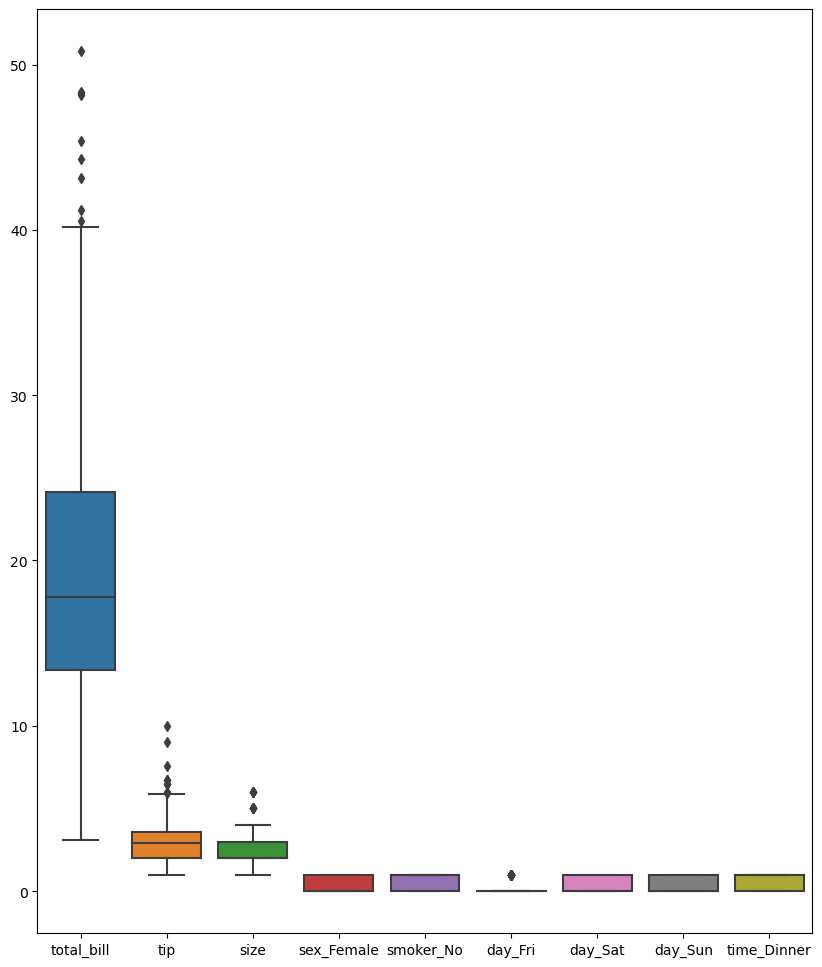

In [25]:
plt.figure(figsize=(10,12))
sns.boxplot(data)

In [32]:
# scaling of the data is required after train and test split 
from sklearn.model_selection import train_test_split
#X=data.drop(columns=['tip'])
y=data['tip']

In [34]:
data.head()
print(X.head())
print(y[:4])

   total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
0       16.99     2           1          1        0        0        1   
1       10.34     3           0          1        0        0        1   
2       21.01     3           0          1        0        0        1   
3       23.68     2           0          1        0        0        1   
4       24.59     4           1          1        0        0        1   

   time_Dinner  
0            1  
1            1  
2            1  
3            1  
4            1  
0    1.01
1    1.66
2    3.50
3    3.31
Name: tip, dtype: float64


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<AxesSubplot: >

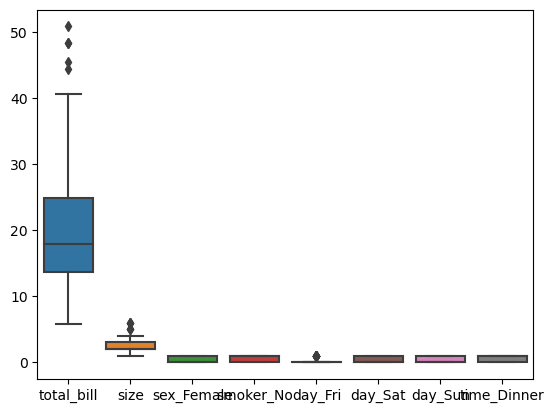

In [42]:
X_train.shape
sns.boxplot(X_train)
# Scaling of the data

In [43]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_scaled=std.fit_transform(X_train)
X_test_scaled=std.transform(X_test)

/tmp/ipykernel_106/2367189745.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


<AxesSubplot: >

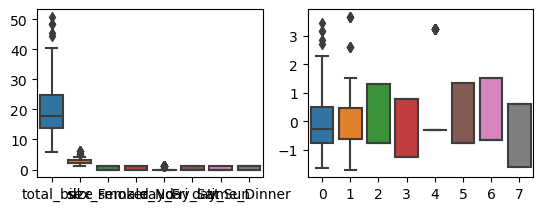

In [45]:
plt.subplots()
plt.subplot(2,2,1)
sns.boxplot(X_train)
plt.subplot(2,2,2)
sns.boxplot(X_train_scaled)
# as the data is scaled and ready for prediction we will create the layers 

In [46]:
import keras 
from keras import regularizers
from keras.layers import Dense,Flatten
from keras import activations

In [47]:
X_train_scaled.shape

(183, 8)

In [59]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[8],name='inputLayer'),
        tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=tf.keras.initializers.GlorotNormal()),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.initializers.GlorotNormal()),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16,activation='relu',kernel_regularizer=tf.keras.initializers.GlorotNormal()),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
    
]
model_clf=tf.keras.Sequential(LAYERS)

In [60]:
model_clf.layers

In [61]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 64)                576       
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dropout_11 (Dropout)        (None, 16)               

In [62]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [70]:
EPOCHS=5

history=history = model_clf.fit(X_train_scaled, y_train, epochs=EPOCHS)

Epoch 1/5


TypeError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1110, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1424, in losses
        loss_tensor = regularizer()
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1505, in _tag_callable
        loss = loss()
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 2834, in _loss_for_variable
        regularization = regularizer(v)
    File "/opt/conda/lib/python3.10/site-packages/keras/initializers/initializers.py", line 637, in __call__
        return self._generate_init_val(shape=shape, dtype=dtype, nonce=nonce)
    File "/opt/conda/lib/python3.10/site-packages/keras/initializers/initializers.py", line 641, in _generate_init_val
        fan_in, fan_out = _compute_fans(shape)
    File "/opt/conda/lib/python3.10/site-packages/keras/initializers/initializers.py", line 1135, in _compute_fans
        if len(shape) < 1:  # Just to avoid errors for constants.

    TypeError: object of type 'ResourceVariable' has no len()


In [73]:
mnist=tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [74]:
x_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

# scale the test set as well 
X_test=X_test/255

In [84]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',kernel_regularizer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(60,activation='relu',kernel_regularizer=tf.keras.initializers.GlorotUniform()),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax')
    
]
model_clf=tf.keras.Sequential(LAYERS)

In [85]:
model_clf.layers

In [86]:
model_clf.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 300)               235500    
                                                                 
 dropout_18 (Dropout)        (None, 300)               0         
                                                                 
 dense_25 (Dense)            (None, 100)               30100     
                                                                 
 dropout_19 (Dropout)        (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 60)                6060      
                                                                 
 dropout_20 (Dropout)        (None, 60)               

In [87]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
OPTIMIZER='SGD'
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [88]:
EPOCHS=30
VALIDATION_SET=(x_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/30


TypeError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1110, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1424, in losses
        loss_tensor = regularizer()
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1505, in _tag_callable
        loss = loss()
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 2834, in _loss_for_variable
        regularization = regularizer(v)
    File "/opt/conda/lib/python3.10/site-packages/keras/initializers/initializers.py", line 637, in __call__
        return self._generate_init_val(shape=shape, dtype=dtype, nonce=nonce)
    File "/opt/conda/lib/python3.10/site-packages/keras/initializers/initializers.py", line 641, in _generate_init_val
        fan_in, fan_out = _compute_fans(shape)
    File "/opt/conda/lib/python3.10/site-packages/keras/initializers/initializers.py", line 1135, in _compute_fans
        if len(shape) < 1:  # Just to avoid errors for constants.

    TypeError: object of type 'ResourceVariable' has no len()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns 

2023-06-16 05:19:49.511716: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 05:19:49.580979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 05:19:49.582207: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 05:19:50.602289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
mnist=tf.keras.datasets.mnist

In [9]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [10]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [12]:
# fraction or scale the data 
x_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

X_test=X_test/255

In [13]:
len(X_train_full[5000:])

55000

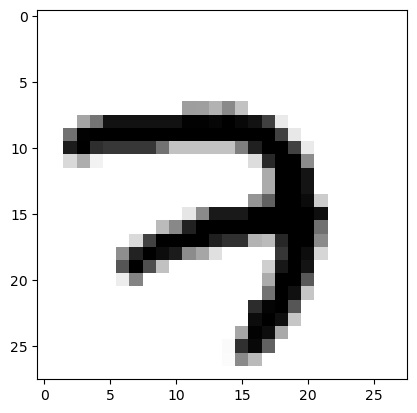

In [14]:
plt.imshow(X_train[0],cmap='binary')
plt.show()

<AxesSubplot: >

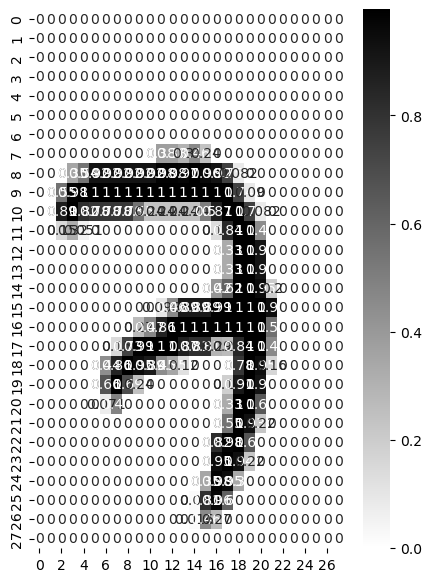

In [16]:
plt.figure(figsize=(5,7))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [20]:
from keras import regularizers
from keras import activations

In [22]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=[28,28],name='inputlayer'),
    tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax',name='hiddenlayer')
]

model_clf=tf.keras.models.Sequential(LAYERS)

In [23]:
# method 2
from keras import Sequential
from keras.layers import Dense,Flatten


In [90]:
fashion_data=tf.keras.datasets.fashion_mnist

In [92]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [93]:
X_train_full.shape

(60000, 28, 28)

In [94]:
x_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

X_test=X_test/255

In [95]:
len(X_train_full[5000:])

55000

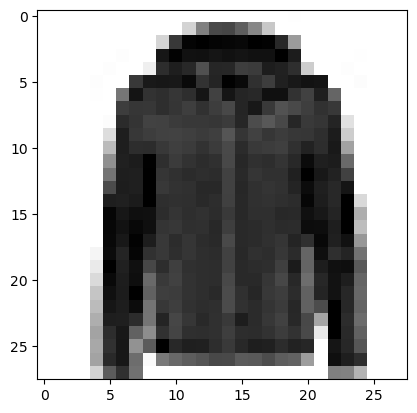

In [96]:
plt.imshow(X_train[0],cmap='binary')
plt.show()

<AxesSubplot: >

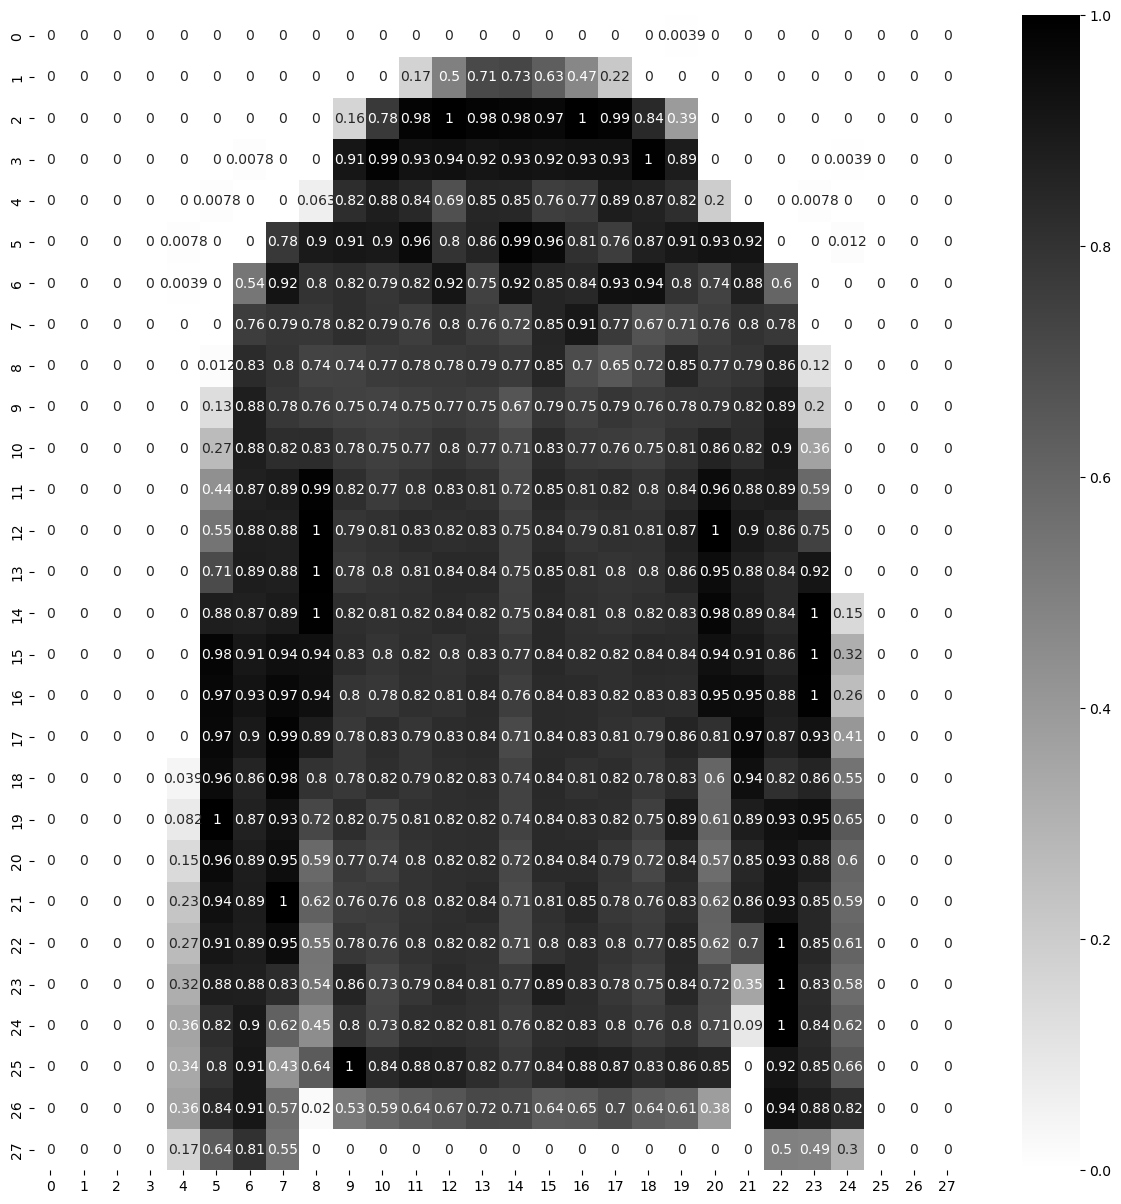

In [97]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap='binary')

In [98]:
Layers=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='hiddenLayer1'),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenLayers2'),
        tf.keras.layers.Dense(10,activation='softmax',name='outputLayer')
       ]
model_clf=tf.keras.models.Sequential(Layers)

In [99]:
model_clf.layers

In [100]:
model_clf.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayers2 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [101]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [102]:
hidden1.get_weights()[0].shape

(784, 300)

In [103]:
LOSS_FUNCTION='sparse_categorical_crossentropy' # use=>tf.losses.sparese_categorical_crossentropy
OPTIMIZER="SGD" # or use with custom learning rate => tf.keras.optimisers.SGD(0.02)
METRICS=['accuracy']

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS
                 )

In [104]:
EPOCHS=10
VALIDATION_SET=(x_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7215 - accuracy: 0.7657 - val_loss: 0.5090 - val_accuracy: 0.8302
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4874 - accuracy: 0.8299 - val_loss: 0.4479 - val_accuracy: 0.8546
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8437 - val_loss: 0.4638 - val_accuracy: 0.8412
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4180 - accuracy: 0.8529 - val_loss: 0.3978 - val_accuracy: 0.8614
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3959 - accuracy: 0.8605 - val_loss: 0.3930 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3802 - accuracy: 0.8646 - val_loss: 0.3897 - val_accuracy: 0.8650
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3671 - accuracy: 0.8694 - val_loss: 0.3711 - val_accuracy:

In [117]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='Hiddenlayer1',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax',name='Hiddenlayer')
    
]
model_clf=tf.keras.Sequential(LAYERS)

In [118]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
METRICS=['accuracy']
OPTIMIZER='SGD'
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [119]:
EPOCHS=10
VALIDATION_SET=(x_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9921 - accuracy: 0.7203 - val_loss: 0.7135 - val_accuracy: 0.8148
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7188 - accuracy: 0.8092 - val_loss: 0.6272 - val_accuracy: 0.8418
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6591 - accuracy: 0.8285 - val_loss: 0.5868 - val_accuracy: 0.8562
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6211 - accuracy: 0.8394 - val_loss: 0.5626 - val_accuracy: 0.8590
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5943 - accuracy: 0.8465 - val_loss: 0.5607 - val_accuracy: 0.8604
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5752 - accuracy: 0.8532 - val_loss: 0.5375 - val_accuracy: 0.8636
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5589 - accuracy: 0.8592 - val_loss: 0.5280 - val_accuracy:

In [120]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5386 - accuracy: 0.8626


[0.5386179089546204, 0.8626000285148621]

In [121]:
x_new=X_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [122]:
actual=y_test[:3]
actual

array([9, 2, 1], dtype=uint8)

<AxesSubplot: >

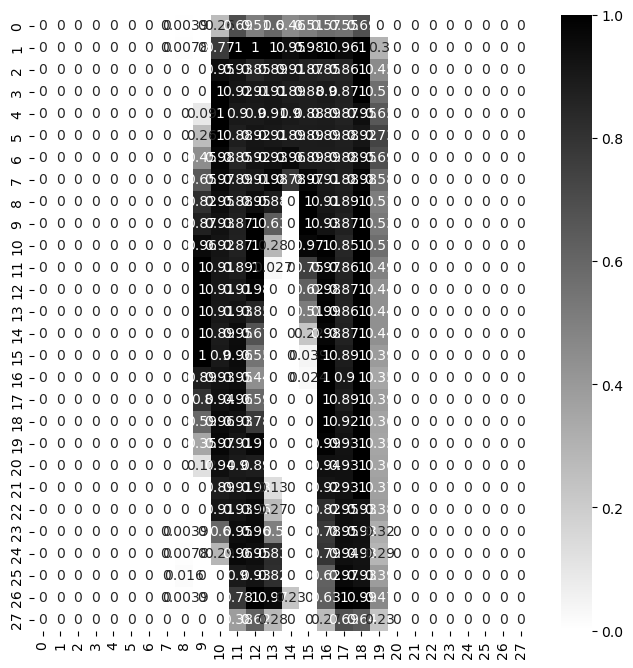

In [123]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2],annot=True,cmap='binary')

In [124]:
y_prob=model_clf.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 127ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.13, 0.01, 0.83],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [125]:
y_pred=np.argmax(y_prob,axis=1)

In [126]:
y_pred

array([9, 2, 1])

In [131]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='inputLayer'),
        tf.keras.layers.Dense(300,activation='relu',name='Hiddenlayer1',kernel_initializer=tf.keras.initializers.GlorotNormal()),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2',kernel_initializer=tf.keras.initializers.GlorotNormal()),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='softmax',name='Hiddenlayer')
    
]
model_clf=tf.keras.Sequential(LAYERS)

In [132]:
LOSS_FUNCTION='sparse_categorical_crossentropy'
METRICS=['accuracy']
OPTIMIZER='SGD'
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [133]:
EPOCHS=10
VALIDATION_SET=(x_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,
                      validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8322 - accuracy: 0.7144 - val_loss: 0.5422 - val_accuracy: 0.8080
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5571 - accuracy: 0.8073 - val_loss: 0.4628 - val_accuracy: 0.8388
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4960 - accuracy: 0.8254 - val_loss: 0.4235 - val_accuracy: 0.8540
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4593 - accuracy: 0.8362 - val_loss: 0.3984 - val_accuracy: 0.8586
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4361 - accuracy: 0.8451 - val_loss: 0.3852 - val_accuracy: 0.8680
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4176 - accuracy: 0.8517 - val_loss: 0.3694 - val_accuracy: 0.8690
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4007 - accuracy: 0.8584 - val_loss: 0.3651 - val_accuracy:

In [134]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 87s 275ms/step - loss: 0.3876 - accuracy: 0.8594


[0.3876490294933319, 0.8593999743461609]

In [138]:
x_new=X_test[:7]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [136]:
actual=y_test[:7]
actual

array([9, 2, 1, 1, 6, 1, 4], dtype=uint8)

<AxesSubplot: >

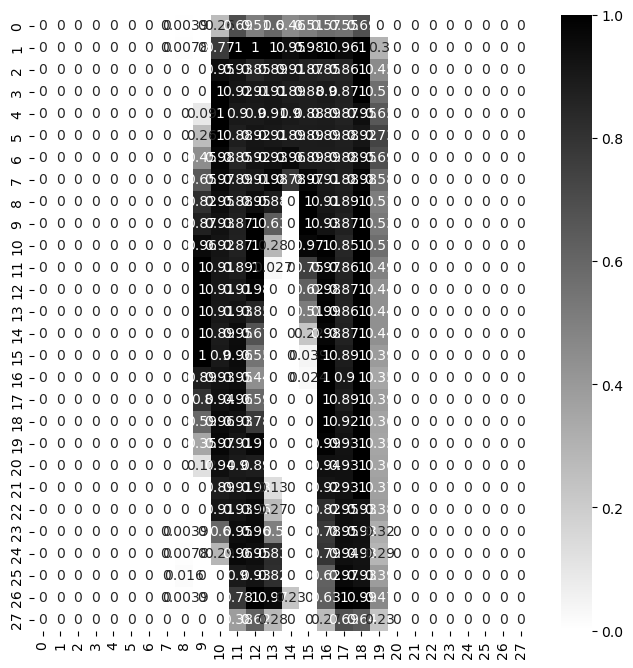

In [139]:
plt.figure(figsize=(8,8))
sns.heatmap(X_test[2],annot=True,cmap='binary')

In [140]:
y_prob=model_clf.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 156ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.12, 0.  , 0.86],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.26, 0.  , 0.14, 0.01, 0.01, 0.  , 0.58, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.92, 0.  , 0.04, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [141]:
y_pred=np.argmax(y_prob,axis=1)

In [142]:
y_pred

array([9, 2, 1, 1, 6, 1, 4])